### Principle Component Analysis (PCA)

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib.backend_bases import RendererBase 

In [38]:
np.random.seed(23)

In [39]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1,cov_mat1,20)

In [40]:
df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target']=1

In [41]:
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2,cov_mat2,20)

In [42]:
df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])
df['target']=0

In [43]:
df = df._append(df1,ignore_index=True)

In [44]:
df=df.sample(40)

In [45]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,0.0
34,0.177061,-0.598109,1.226512,NaN
14,0.420623,0.411620,-0.071324,0.0
11,1.968435,-0.547788,-0.679418,0.0
12,-2.506230,0.146960,0.606195,0.0


In [46]:
import plotly.express as px


In [47]:
fig = px.scatter_3d(df,x=df['feature1'],y=df['feature2'],z=df['feature3'],color=df['target'].astype('str'))

In [48]:
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))

### applying standard scaling
### step - 1

In [49]:
from sklearn.preprocessing import StandardScaler


In [50]:
scalar = StandardScaler()

In [51]:
df.iloc[:,0:3]=scalar.fit_transform(df.iloc[:,0:3])

### Finding covariance matrix 
### step 2

In [52]:
covariance_matrix = np.cov(df.iloc[:, 0:3], rowvar=False)
print(covariance_matrix)

[[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


### Finding the eigen values
### step 3

In [53]:
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [54]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [55]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


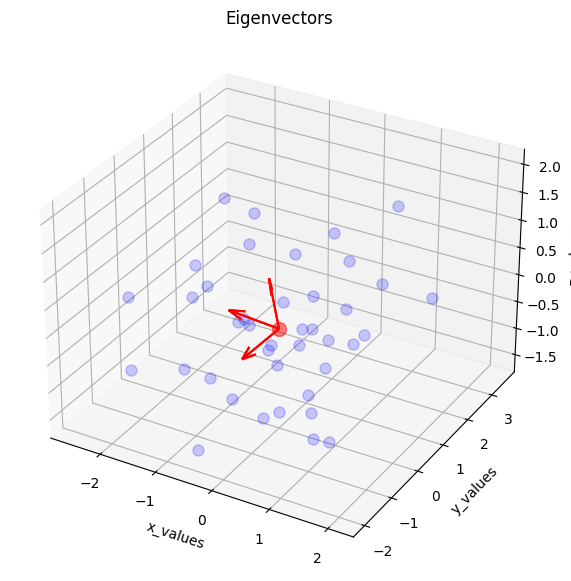

In [56]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)

mean_feature1 = df['feature1'].mean()
mean_feature2 = df['feature2'].mean()
mean_feature3 = df['feature3'].mean()

# Plot the arrow
for v in eigen_vectors:
    a=ax.quiver(mean_feature1, mean_feature2, mean_feature3, v[0], v[1], v[2], color='r', arrow_length_ratio=0.3)
    ax.add_artist(a)


ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [57]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [58]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,0.0
1,1.056919,-0.212737,NaN
2,-0.271876,0.498222,0.0
3,-0.621586,0.023110,0.0
4,1.567286,1.730967,0.0


In [60]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()